### Importing librairies + Data

In [304]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [305]:
import pandas_datareader as pdr
import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
values = pd.read_csv('data\mapping.csv', sep=';' )

In [306]:
import quandl 
quandl.ApiConfig.api_key = "2f8TXxyiL2rd-j3e_ant"

In [320]:
values['ticker']= "EURONEXT/" + values['ticker']
for i in range (len(values)):
    values.nom[i]= values.nom[i].replace(' ','')
values = values.sort_values('nom')
values = values.reset_index(drop=True)

,ISIN,nom,ticker
0,FR0000120073,AirLiquide,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
1,NL0000235190,Airbus,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
2,FR0010220475,Alstom,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
3,LU1598757687,ArcelorMittal,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
4,FR0000051732,Atos,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
5,FR0000120628,Axa,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
6,FR0000131104,BnpParibas,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
7,FR0000120503,Bouygues,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
8,FR0000125338,CapGemini,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...
9,FR0000120172,Carrefour,EURONEXT/EURONEXT/EURONEXT/EURONEXT/EURONEXT/E...


In [308]:
df_cac40=quandl.get(values['ticker'][0])
df_cac40.columns = pd.MultiIndex.from_product([[values['nom'][0]],df_cac40.columns])

for i in range (1, len(values)):
    temp=quandl.get(values['ticker'][i])
    temp.columns = pd.MultiIndex.from_product([[values['nom'][i]],temp.columns])
    df_cac40= pd.concat([df_cac40,temp],axis=1)
df_cac40

CreditAgricole                                                    \
                     Open    High     Low    Last      Volume      Turnover   
Date                                                                          
2014-02-14         10.635  10.725  10.590  10.715   4817991.0  5.146331e+07   
2014-02-17         10.715  10.840  10.690  10.795   3570414.0  3.852735e+07   
2014-02-18         10.805  10.815  10.710  10.790   5079312.0  5.468410e+07   
2014-02-19         10.990  11.100  10.860  11.010  10343670.0  1.136431e+08   
2014-02-20         10.935  11.250  10.820  11.175   7395374.0  8.174550e+07   
...                   ...     ...     ...     ...         ...           ...   
2020-10-07          7.730   7.758   7.618   7.666   6793383.0  5.214035e+07   
2020-10-08          7.718   7.872   7.700   7.778   4523966.0  3.523523e+07   
2020-10-09          7.830   7.850   7.594   7.670   5917701.0  4.548303e+07   
2020-10-12          7.700   7.782   7.644   7.710   4407030.0  3.393833e+07   
2020-10-13          7.694   7.700   7.392   7.418   5817785.0  4.338263e+07   

             Atos                       ... Stmicroelectronics          \
             Open   High    Low   Last  ...                Low    Last   
Date                                    ...                              
2014-02-14  68.99  69.24  68.58  68.63  ...              6.110   6.225   
2014-02-17  68.96  69.47  68.73  69.46  ...              6.150   6.251   
2014-02-18  69.50  69.61  68.88  69.44  ...              6.174   6.245   
2014-02-19  68.00  68.48  66.41  66.94  ...              6.113   6.142   
2014-02-20  66.48  67.20  65.72  67.00  ...              6.010   6.060   
...           ...    ...    ...    ...  ...                ...     ...   
2020-10-07  68.84  69.00  67.52  67.90  ...             27.950  28.230   
2020-10-08  68.38  69.84  68.34  69.66  ...             28.180  28.500   
2020-10-09  69.98  71.14  69.78  70.58  ...             28.580  29.270   
2020-10-12  71.00  71.68  70.62  71.40  ...             29.270  29.680   
2020-10-13  71.34  71.56  70.38  70.46  ...             29.470  29.900   

                                    Airbus                                  \
               Volume      Turnover   Open   High    Low   Last     Volume   
Date                                                                         
2014-02-14  1520745.0  9.421464e+06  52.07  53.32  52.07  53.20  2344846.0   
2014-02-17  1028463.0  6.411316e+06  53.44  53.52  52.39  52.70  1080275.0   
2014-02-18  1643038.0  1.021970e+07  52.84  53.08  52.45  52.98  1875071.0   
2014-02-19  2081212.0  1.280407e+07  52.75  53.14  52.29  52.84  2075277.0   
2014-02-20  3107101.0  1.883162e+07  52.17  52.73  51.79  52.57  2398654.0   
...               ...           ...    ...    ...    ...    ...        ...   
2020-10-07  1789143.0  5.045392e+07  67.41  67.98  66.12  66.70  1896019.0   
2020-10-08  1712109.0  4.866277e+07  67.37  68.20  66.52  66.92  1669083.0   
2020-10-09  2300108.0  6.699235e+07  66.92  67.83  66.42  66.78  2064860.0   
2020-10-12  1887009.0  5.592777e+07  67.08  67.58  65.78  65.99  1691699.0   
2020-10-13  1967716.0  5.846172e+07  64.50  64.64  63.34  63.68  2160265.0   

                          
                Turnover  
Date                      
2014-02-14  1.241890e+08  
2014-02-17  5.722935e+07  
2014-02-18  9.898064e+07  
2014-02-19  1.094407e+08  
2014-02-20  1.252118e+08  
...                  ...  
2020-10-07  1.267670e+08  
2020-10-08  1.123917e+08  
2020-10-09  1.384394e+08  
2020-10-12  1.124289e+08  
2020-10-13  1.374745e+08  

[1674 rows x 240 columns]

## Data Visulisation

Text(0, 0.5, 'Worldwide gross revenue')

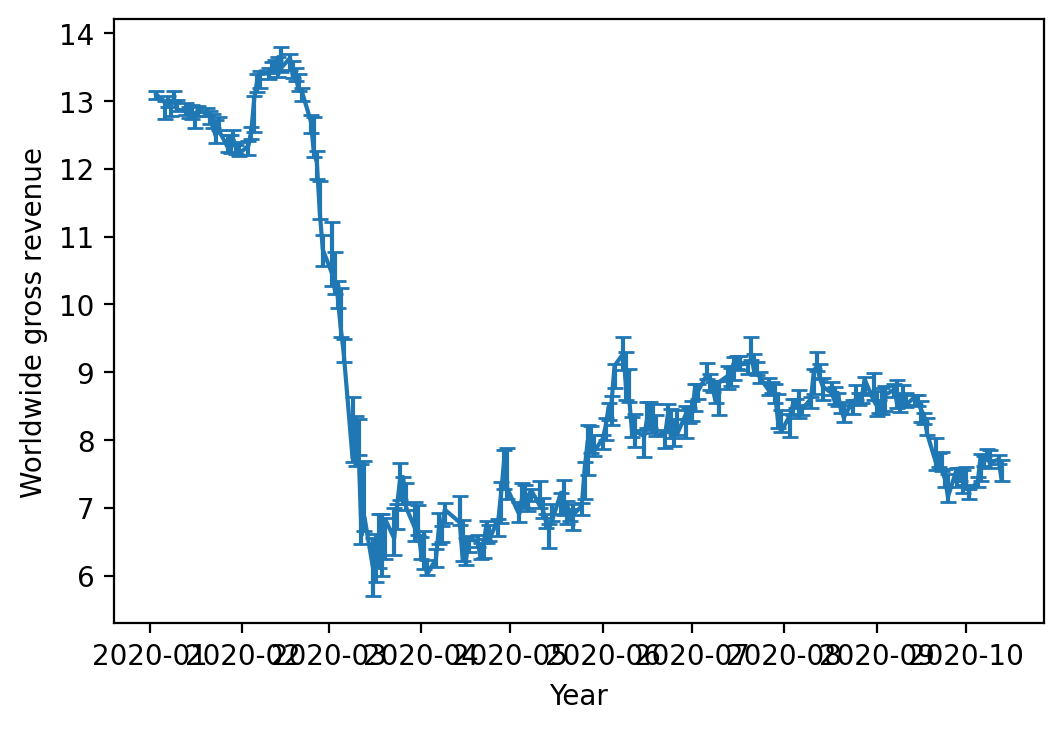

In [8]:
plt.figure(dpi=200)
n=200;
plt.errorbar(df_cac40.index[-n:], df_cac40.CreditAgricole.Last[-n:],
             yerr = [(df_cac40.CreditAgricole.Last[-n:]-df_cac40.CreditAgricole.Low[-n:]),
                     df_cac40.CreditAgricole.High[-n:]-df_cac40.CreditAgricole.Last[-n:]],
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

In [12]:
grad_day=(df_cac40.CreditAgricole.Last-df_cac40.CreditAgricole.Open)/df_cac40.CreditAgricole.Open *100

Date
2014-02-14    0.752233
2014-02-17    0.746617
2014-02-18   -0.138825
2014-02-19    0.181984
2014-02-20    2.194787
                ...   
2020-10-07   -0.827943
2020-10-08    0.777403
2020-10-09   -2.043423
2020-10-12    0.129870
2020-10-13   -3.587211
Length: 1674, dtype: float64

In [80]:
grad_2days=pd.DataFrame(index=df_cac40.index, columns = ["grad_2days"])
for i in range(2,len(df_cac40.CreditAgricole)):
    grad_2days=(df_cac40.CreditAgricole.Last[i]-df_cac40.CreditAgricole.Open[(i-2)])/2

In [81]:
grad_2days

-0.20599999999999996

In [321]:
for j  in range (0, len(values)):
    df_cac40 = df_cac40.sort_index(axis=1)
    SMA=pd.DataFrame(index=df_cac40.index, columns = ["SMA2", "SMA5", "SMA10", "SMA30"])
    for i in range (len(df_cac40[values['nom'][j]])-1):
        SMA.SMA2[i+1]= sum(df_cac40[values['nom'][j]]['Last'][i:i+2]) /2
    for i in range (len(df_cac40[values['nom'][j]])-4):   
        SMA.SMA5[i+4]= sum(df_cac40[values['nom'][j]]['Last'][i:i+5]) /5
    for i in range (len(df_cac40[values['nom'][j]])-9):   
        SMA.SMA10[i+9]= sum(df_cac40[values['nom'][j]]['Last'][i:i+10]) /10
    for i in range (len(df_cac40[values['nom'][j]])-29):   
        SMA.SMA30[i+29]= sum(df_cac40[values['nom'][j]]['Last'][i:i+30]) /30
        df_cac40[values['nom'][j],'SMA2'] = SMA.SMA2
    df_cac40[values['nom'][j], 'SMA5'] = SMA.SMA5
    df_cac40[values['nom'][j], 'SMA10'] = SMA.SMA10
    df_cac40[values['nom'][j], 'SMA30'] = SMA.SMA30

In [323]:
df_cac40

AirLiquide                                                     \
                 High    Last     Low    Open    SMA10     SMA2    SMA30   
Date                                                                       
2014-02-14     100.00  100.00   99.08   99.51      NaN      NaN      NaN   
2014-02-17     100.30   99.33   99.20  100.00      NaN   99.665      NaN   
2014-02-18     100.00   98.11   97.52  100.00      NaN    98.72      NaN   
2014-02-19      98.82   98.74   97.49   97.49      NaN   98.425      NaN   
2014-02-20      98.58   98.58   97.20   97.43      NaN    98.66      NaN   
...               ...     ...     ...     ...      ...      ...      ...   
2020-10-07     133.15  132.80  131.80  132.45   134.91    132.6   138.21   
2020-10-08     133.65  133.20  132.15  133.40  134.675      133  137.983   
2020-10-09     133.90  133.55  132.65  133.45  134.585  133.375  137.782   
2020-10-12     135.60  135.50  133.30  133.50  134.415  134.525  137.663   
2020-10-13     135.80  135.60  134.75  135.20  134.225   135.55  137.545   

                                             ... Worldline                \
              SMA5      Turnover     Volume  ...      High   Last    Low   
Date                                         ...                           
2014-02-14     NaN  7.397914e+07   740908.0  ...       NaN    NaN    NaN   
2014-02-17     NaN  6.537874e+07   657021.0  ...       NaN    NaN    NaN   
2014-02-18     NaN  1.041123e+08  1060488.0  ...       NaN    NaN    NaN   
2014-02-19     NaN  7.790627e+07   792538.0  ...       NaN    NaN    NaN   
2014-02-20  98.952  7.819688e+07   796932.0  ...       NaN    NaN    NaN   
...            ...           ...        ...  ...       ...    ...    ...   
2020-10-07  133.78  1.067602e+08   804950.0  ...     71.18  70.00  69.94   
2020-10-08  133.41  7.368233e+07   553850.0  ...     71.56  71.00  70.32   
2020-10-09  133.09  7.940701e+07   595740.0  ...     71.52  70.50  70.40   
2020-10-12  133.49  9.668776e+07   715958.0  ...     71.62  71.24  70.50   
2020-10-13  134.13  6.632516e+07   490690.0  ...     73.42  73.18  71.20   

                                                                         
             Open    Turnover    Volume   SMA2    SMA5   SMA10    SMA30  
Date                                                                     
2014-02-14    NaN         NaN       NaN    NaN     NaN     NaN      NaN  
2014-02-17    NaN         NaN       NaN    NaN     NaN     NaN      NaN  
2014-02-18    NaN         NaN       NaN    NaN     NaN     NaN      NaN  
2014-02-19    NaN         NaN       NaN    NaN     NaN     NaN      NaN  
2014-02-20    NaN         NaN       NaN    NaN     NaN     NaN      NaN  
...           ...         ...       ...    ...     ...     ...      ...  
2020-10-07  70.74  54360612.0  773247.0  70.33  70.872  71.774  74.8453  
2020-10-08  70.54  44747582.0  629970.0   70.5  70.636  71.488   74.644  
2020-10-09  71.22  42292595.0  597635.0  70.75  70.716  71.216  74.4027  
2020-10-12  70.66  50865235.0  715412.0  70.87   70.68   70.94    74.21  
2020-10-13  72.02  66193848.0  911703.0  72.21  71.184   71.04  74.0133  

[1674 rows x 400 columns]

In [288]:
df_cac40[values['nom'][j]]['Last']

Date
2014-02-14    68.63
2014-02-17    69.46
2014-02-18    69.44
2014-02-19    66.94
2014-02-20    67.00
              ...  
2020-10-07    67.90
2020-10-08    69.66
2020-10-09    70.58
2020-10-12    71.40
2020-10-13    70.46
Name: Last, Length: 1674, dtype: float64

In [212]:
SMA[['SMA2', 'SMA5', 'SMA10', 'SMA30']]

,SMA2,SMA5,SMA10,SMA30
Date,,,,
2014-02-14,NaN,NaN,NaN,NaN
2014-02-17,10.755,NaN,NaN,NaN
2014-02-18,10.7925,NaN,NaN,NaN
2014-02-19,10.9,NaN,NaN,NaN
2014-02-20,11.0925,10.897,NaN,NaN
...,...,...,...,...
2020-10-07,7.718,7.482,7.4448,8.0886
2020-10-08,7.722,7.57,7.4804,8.06067
2020-10-09,7.724,7.6536,7.531,8.0198


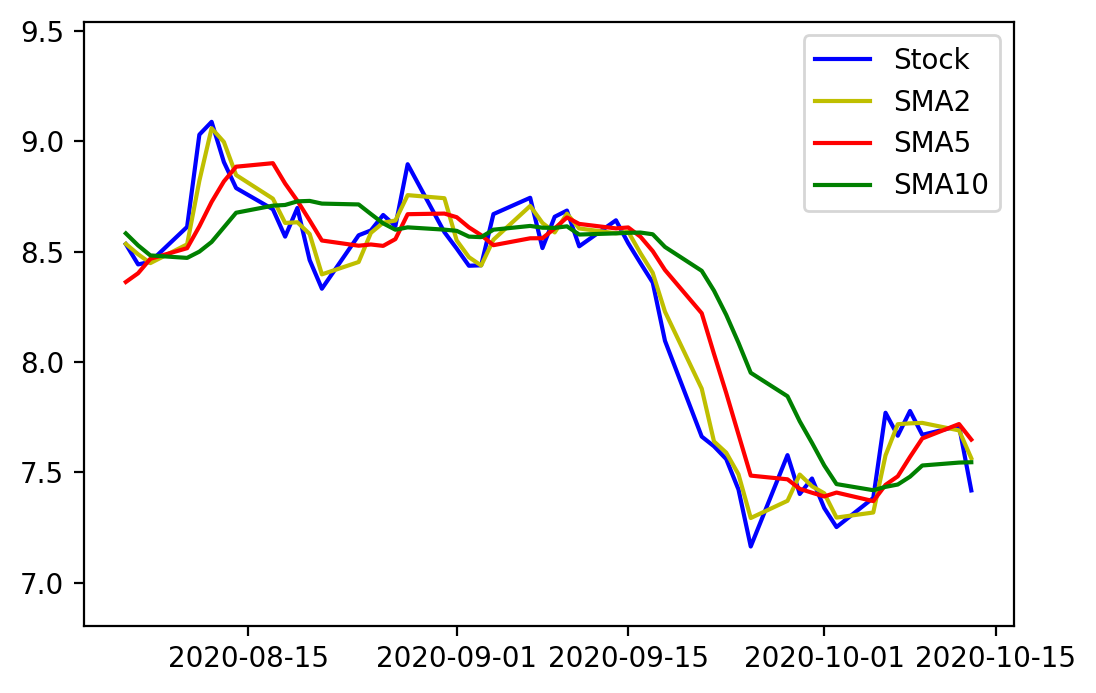

In [159]:
n=50
plt.figure(dpi=200)
plt.ylim(0.95*min(df_cac40.CreditAgricole.Last[-n:]), 1.05*max(df_cac40.CreditAgricole.Last[-n:]))
plt.plot(df_cac40.index[-n:], df_cac40.CreditAgricole.Last[-n:], 'b', label='Stock')
plt.plot(df_cac40.index[-n:], SMA.SMA2[-n:], 'y', label='SMA2')
plt.plot(df_cac40.index[-n:], SMA.SMA5[-n:], 'r', label='SMA5')
plt.plot(df_cac40.index[-n:], SMA.SMA10[-n:], 'g', label='SMA10')
#plt.plot(df_cac40.index[-n:], SMA.SMA30[-n:], 'c', label='SMA30')
#plt.plot(df_cac40.index[-n:], grad_2days[-n:])
plt.legend()
plt.show()

Si stock > SMA10 -> buy
Else if stock < SMA2 -> sell
Else wait